In [2]:
from sqlalchemy import create_engine
from config import password
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

engine_string = 'postgresql://postgres:' + password + '@localhost:5432/homework_db'
engine = create_engine(engine_string)
connection = engine.connect()

In [3]:
query_str = open('bonus_query.sql')
query_text = ""
for text in query_str:
    query_text = query_text + text
    
print(query_text)

-- Most common salary ranges for employees.
SELECT e.emp_no, s.salary, MAX(s.from_date)
FROM
	employees e
	INNER JOIN salaries s
	ON e.emp_no = s.emp_no
GROUP BY e.emp_no, s.salary
ORDER BY s.salary DESC


In [4]:
# df_new = pd.read_sql('firepower', engine)
df_query = pd.read_sql_query(query_text, con=connection)

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "employees" does not exist
LINE 4:  employees e
         ^

[SQL: -- Most common salary ranges for employees.
SELECT e.emp_no, s.salary, MAX(s.from_date)
FROM
	employees e
	INNER JOIN salaries s
	ON e.emp_no = s.emp_no
GROUP BY e.emp_no, s.salary
ORDER BY s.salary DESC]
(Background on this error at: http://sqlalche.me/e/f405)

In [9]:
df_query.head()

,emp_no,salary,max
0,205000,129492,10/12/1991
1,44188,127238,3/16/1991
2,444756,127041,6/14/1999
3,458302,126703,10/5/1998
4,37558,125469,2/23/1989


In [10]:
bins = [35000, 45000, 55000, 65000, 75000, 85000, 95000, 999999]
group_names = ["35-45", "45-55", "55-65", "65-75", "75-85", "85-95", ">95"]
df = pd.DataFrame()
df_query["Salary_Bins"] = pd.cut(df_query["salary"], bins, labels=group_names)

In [11]:
df_query.head()

,emp_no,salary,max,Salary_Bins
0,205000,129492,10/12/1991,>95
1,44188,127238,3/16/1991,>95
2,444756,127041,6/14/1999,>95
3,458302,126703,10/5/1998,>95
4,37558,125469,2/23/1989,>95


In [12]:
df_groupby = df_query.groupby(['Salary_Bins'])
df_salaries_histo = df_groupby['Salary_Bins'].count()
df_salaries_histo.head()

Salary_Bins
35-45    126277
45-55     63063
55-65     49940
65-75     32726
75-85     17807
Name: Salary_Bins, dtype: int64

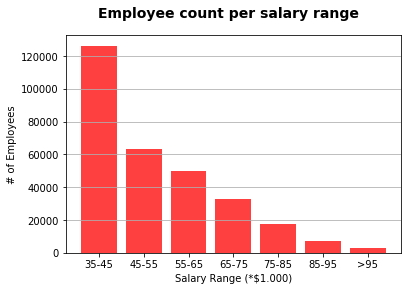

In [13]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(len(df_salaries_histo))

tick_locations = [value for value in x_axis]
salaries = group_names
plt.xticks(x_axis, salaries)

# Plot the chart with lables and title
plt.bar(x_axis, df_salaries_histo, color='r', alpha=0.75)
plt.grid(which='major', axis='y')
plt.xlabel("Salary Range (*$1.000)")
plt.ylabel("# of Employees")
plt.suptitle("Employee count per salary range", fontsize=14, fontweight="bold")
plt.savefig("Emp_Sal.png")

In [14]:
query_str = open('bonus_query2.sql')
query_text = ""
for text in query_str:
    query_text = query_text + text
    
print(query_text)

SELECT t.title "Title", round(avg(s.salary)) "Average Salary"
FROM employees e
	INNER JOIN salaries s
	ON e.emp_no=s.emp_no
	INNER JOIN titles t
	ON e.emp_no=t.emp_no
GROUP BY t.title
ORDER BY "Average Salary" DESC


In [15]:
# df_new = pd.read_sql('firepower', engine)
df_query2 = pd.read_sql_query(query_text, con=connection)

In [16]:
df_query2

,Title,Average Salary


IndexError: single positional indexer is out-of-bounds

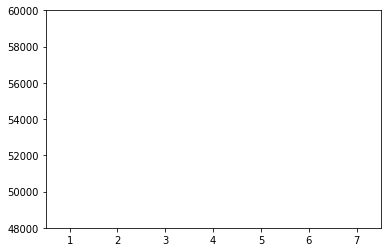

In [17]:
avg_salary = df_query2['Average Salary']

plt.ylim(48000,60000)
plt.xlim(0.5,7.5)

#Used handles to assign specific colors - personal choice

legend1, = plt.bar(1, df_query2.iloc[0,1], color='red', alpha=0.75, label=df_query2.iloc[0,0])
legend2, = plt.bar(2, df_query2.iloc[1,1], color='orange', alpha=0.75,label=df_query2.iloc[1,0])
legend3, = plt.bar(3, df_query2.iloc[2,1], color='yellow', alpha=0.75,label=df_query2.iloc[2,0])
legend4, = plt.bar(4, df_query2.iloc[3,1], color='green', alpha=0.75,label=df_query2.iloc[3,0])
legend5, = plt.bar(5, df_query2.iloc[4,1], color='blue', alpha=0.75,label=df_query2.iloc[4,0])
legend6, = plt.bar(6, df_query2.iloc[5,1], color='indigo', alpha=0.75,label=df_query2.iloc[5,0])
legend7, = plt.bar(7, df_query2.iloc[6,1], color='violet', alpha=0.75,label=df_query2.iloc[6,0])

ax = plt.subplot(111)
ax.legend()

# plt.bar(x_axis, avg_salary, color='r', alpha=0.75)
plt.grid(which='major', axis='y')
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.suptitle("Average Salary per Title", fontsize=14, fontweight="bold")
plt.savefig("Avg_Sal.png")

In [18]:
query_str = open('bonus_query3.sql')
query_text = ""
for text in query_str:
    query_text = query_text + text
    
print(query_text)

SELECT t.title, s.salary, e.emp_no, e.first_name, e.last_name, d.dept_name
FROM employees e
	INNER JOIN salaries s
	ON e.emp_no=s.emp_no
	INNER JOIN titles t
	ON e.emp_no=t.emp_no
	INNER JOIN dept_emp de
	ON e.emp_no=de.emp_no
	INNER JOIN departments d
	ON de.dept_no=d.dept_no
WHERE e.emp_no=499942



In [14]:
# df_new = pd.read_sql('firepower', engine)
df_query3 = pd.read_sql_query(query_text, con=connection)

In [19]:
title = df_query3.iloc[0,0]
salary = df_query3.iloc[0,1]
emp_no = df_query3.iloc[0,2]
first_name = df_query3.iloc[0,3].upper()
last_name = df_query3.iloc[0,4].upper()
dept_name = df_query3.iloc[0,5]

print(f"Employee {emp_no} is a {title}, who makes ${salary} a year and is named: {first_name} {last_name}!!!")
print("Employee 499942 proved the datafiles were fake, as staff was making considarably more money then Managers and Engineers")

Employee 499942 is a Technique Leader, who makes $40000 a year and is named: APRIL FOOLSDAY!!!
Employee 499942 proved the datafiles were fake, as staff was making considarably more money then Managers and Engineers
